In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [5]:
data = pd.read_excel('problem_data_new.xlsx')

In [7]:
data.head(15)

,ARCHIVE_DATE,SNAPSHOT_NUMBER,EBS_JOB_NUMBER,JOB_STATUS,SCHEDULED_DATE,JOB_CREATION_DATE,FG_CODE,PLANT,LINE_CODE,SCHEDULED_PRODUCTION_QUANTITY,QUANTITY_START,RM_ITEM_CODE,RM_REQUIRED,RM_INVENTORY,ID,WEEK,JOB_CREATION_FLAG,INVENTORY_DAY_BUCKET,AVAILABLE_INVENTORY,RM Item Coverage,FC_explain,FC_explain_cf,FC_explain_nc,Scheduled-Start,Scheduled-Start_%,Job Coverage,Covered,Covered Flag,Not Covered,Cases per Pallet,EPQ,SS,Scheduled-EPQ,Scheduled-EPQ_%,Low,Medium,High,Spring,Spring Specialty,Spring Non-Specialty,Freeze,Plant,LMS,lms_yes,lms_no,lms_int,lms_fly,D_SCH_ST,SEPQ,TARGET
0,6/24/2020 0:00,1,MPS00552352,Closed,6/24/2020 16:50,2020-09-06 07:44:00,GRV05L24PDMN,ABQ,AB1,25788.0,26788.0,SHV09GRV0524DMN1A,25788.0,0,291149,26,OUTSIDE LOCK WIDNOW,6/24/2020,120306.0,Covered,2,0,0,-1000.0,-0.038778,Covered,1,0,0,84,8316.0,8820.0,17472.0,0.677524,1.0,0.0,0.0,0,0,0,0,ABQ,No,0,1,0,0,0.003257,0.677524,1
1,2020-04-03 00:00:00,1,L00513966,Closed,2020-04-03 12:25:00,2/23/2020 21:50,KRK05L40PDMGPN,ABQ,AB1,20304.0,30000.0,SHV11KRK0540DMNA,20304.0,0,290927,10,OUTSIDE LOCK WIDNOW,2020-04-03 00:00:00,96931.0,Covered,2,0,0,-9696.0,-0.477541,Covered,1,0,0,48,16416.0,5520.0,3888.0,0.191489,1.0,0.0,0.0,0,0,0,0,ABQ,No,0,1,0,0,0.196217,0.191489,0
2,5/20/2020 0:00,1,L00546028,Closed,5/20/2020 12:10,2020-11-05 11:43:00,NDW05L32PDRCHN60,ABQ,AB1,28200.0,31560.0,SHV23NDW0532DRN,22680.0,0,290661,21,OUTSIDE LOCK WIDNOW,5/20/2020,81315.0,Covered,2,0,0,-3360.0,-0.119149,Covered,1,0,0,60,6000.0,1260.0,22200.0,0.787234,1.0,0.0,0.0,0,0,0,1,ABQ,No,0,1,0,0,0.119149,0.787234,0
3,5/22/2020 0:00,1,MPS00536085,Closed,5/22/2020 12:10,2020-08-05 06:48:00,KRK05L40PDMGPN,ABQ,AB1,24432.0,24816.0,SHV11KRK0540DMNA,24432.0,0,290971,21,OUTSIDE LOCK WIDNOW,5/22/2020,126858.0,Covered,2,0,0,-384.0,-0.015717,Covered,1,0,0,48,16416.0,5520.0,8016.0,0.328094,1.0,0.0,0.0,0,0,0,0,ABQ,No,0,1,0,0,0.015717,0.328094,0
4,5/23/2020 0:00,1,MPS00536083,Closed,5/23/2020 4:45,2020-08-05 06:48:00,GRV05L40PDMN,ABQ,AB1,57840.0,58840.0,SHV03GRV0540DMNA,57840.0,0,291808,21,OUTSIDE LOCK WIDNOW,5/23/2020,0.0,Covered Flag,0,2,0,-1000.0,-0.017289,Covered Flag,0,1,0,48,45024.0,34080.0,12816.0,0.221577,1.0,0.0,0.0,0,0,0,0,ABQ,No,0,1,0,0,0.003320,0.221577,0
5,2020-09-02 00:00:00,1,L00504335,Closed,2020-09-02 17:50:00,1/26/2020 21:24,KRK05L40PDMGPN,ABQ,AB1,10032.0,12960.0,SHV11KRK0540DMNA,10032.0,0,290907,7,OUTSIDE LOCK WIDNOW,2020-09-02 00:00:00,145406.0,Covered,2,0,0,-2928.0,-0.291866,Covered,1,0,0,48,16416.0,5520.0,-6384.0,-0.636364,1.0,0.0,0.0,0,0,0,1,ABQ,No,0,1,0,0,0.196172,0.636364,0
6,7/31/2020 0:00,1,L00566486,Closed,7/31/2020 15:45,7/21/2020 9:18,GRV05L40PDMN,ABQ,AB1,116256.0,132432.0,SHV03GRV0540DMNA,116256.0,0,291854,31,OUTSIDE LOCK WIDNOW,7/31/2020,502089.0,Covered,2,0,0,-16176.0,-0.139141,Covered,1,0,0,48,45024.0,34080.0,71232.0,0.612717,1.0,0.0,0.0,0,0,0,1,ABQ,No,0,1,0,0,0.139141,0.612717,0
7,2020-09-04 00:00:00,1,L00529412,Closed,2020-09-04 05:55:00,3/30/2020 15:19,GRV05L40PDMN,ABQ,AB1,50016.0,67240.0,SHV03GRV0540DMNA,46656.0,0,291777,15,OUTSIDE LOCK WIDNOW,2020-09-04 00:00:00,375198.0,Covered,2,0,0,-17224.0,-0.344370,Covered,1,0,0,48,45024.0,34080.0,4992.0,0.099808,1.0,0.0,0.0,0,0,0,0,ABQ,No,0,1,0,0,0.333973,0.099808,0
8,7/22/2020 0:00,1,L00562455,Closed,7/22/2020 17:20,2020-07-07 15:56:00,MMK05L45PDMN,ABQ,AB1,27846.0,28056.0,SHV04MMK0545DMNA,27846.0,0,291581,30,OUTSIDE LOCK WIDNOW,7/22/2020,129700.0,Covered,2,0,0,-210.0,-0.007541,Covered,1,0,0,42,7098.0,11676.0,20748.0,0.745098,1.0,0.0,0.0,0,0,0,1,ABQ,No,0,1,0,0,0.007541,0.745098,0
9,6/29/2020 0:00,1,L00555708,Closed,6/29/2020 10:50,6/15/2020 8:31,NDW05L24PDRCHN84,ABQ,AB1,17892.0,42924.0,SHV14NDW0524DRN1A,40488.0,0,290804,27,OUTSIDE LOCK WIDNOW,6/29/2020,156169.0,Covered,2,0,0,-25032.0,-1.399061,Covered,1,0,0,84,41664.0,5964.0,-23772.0,-1.328638,1.0,0.0,0.0,0,0,0,1,ABQ,No,0,1,0,0,1.375587,1.328638,0


/tmp/ipykernel_255274/1997682650.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/tmp/ipykernel_255274/1997682650.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/tmp/ipykernel_255274/1997682650.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/tmp/ipykernel_255274/1997682650.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/tmp/ipykernel_255274/1997682650.py:16: UserWarning: No artists with labels found to put in legend.  Not

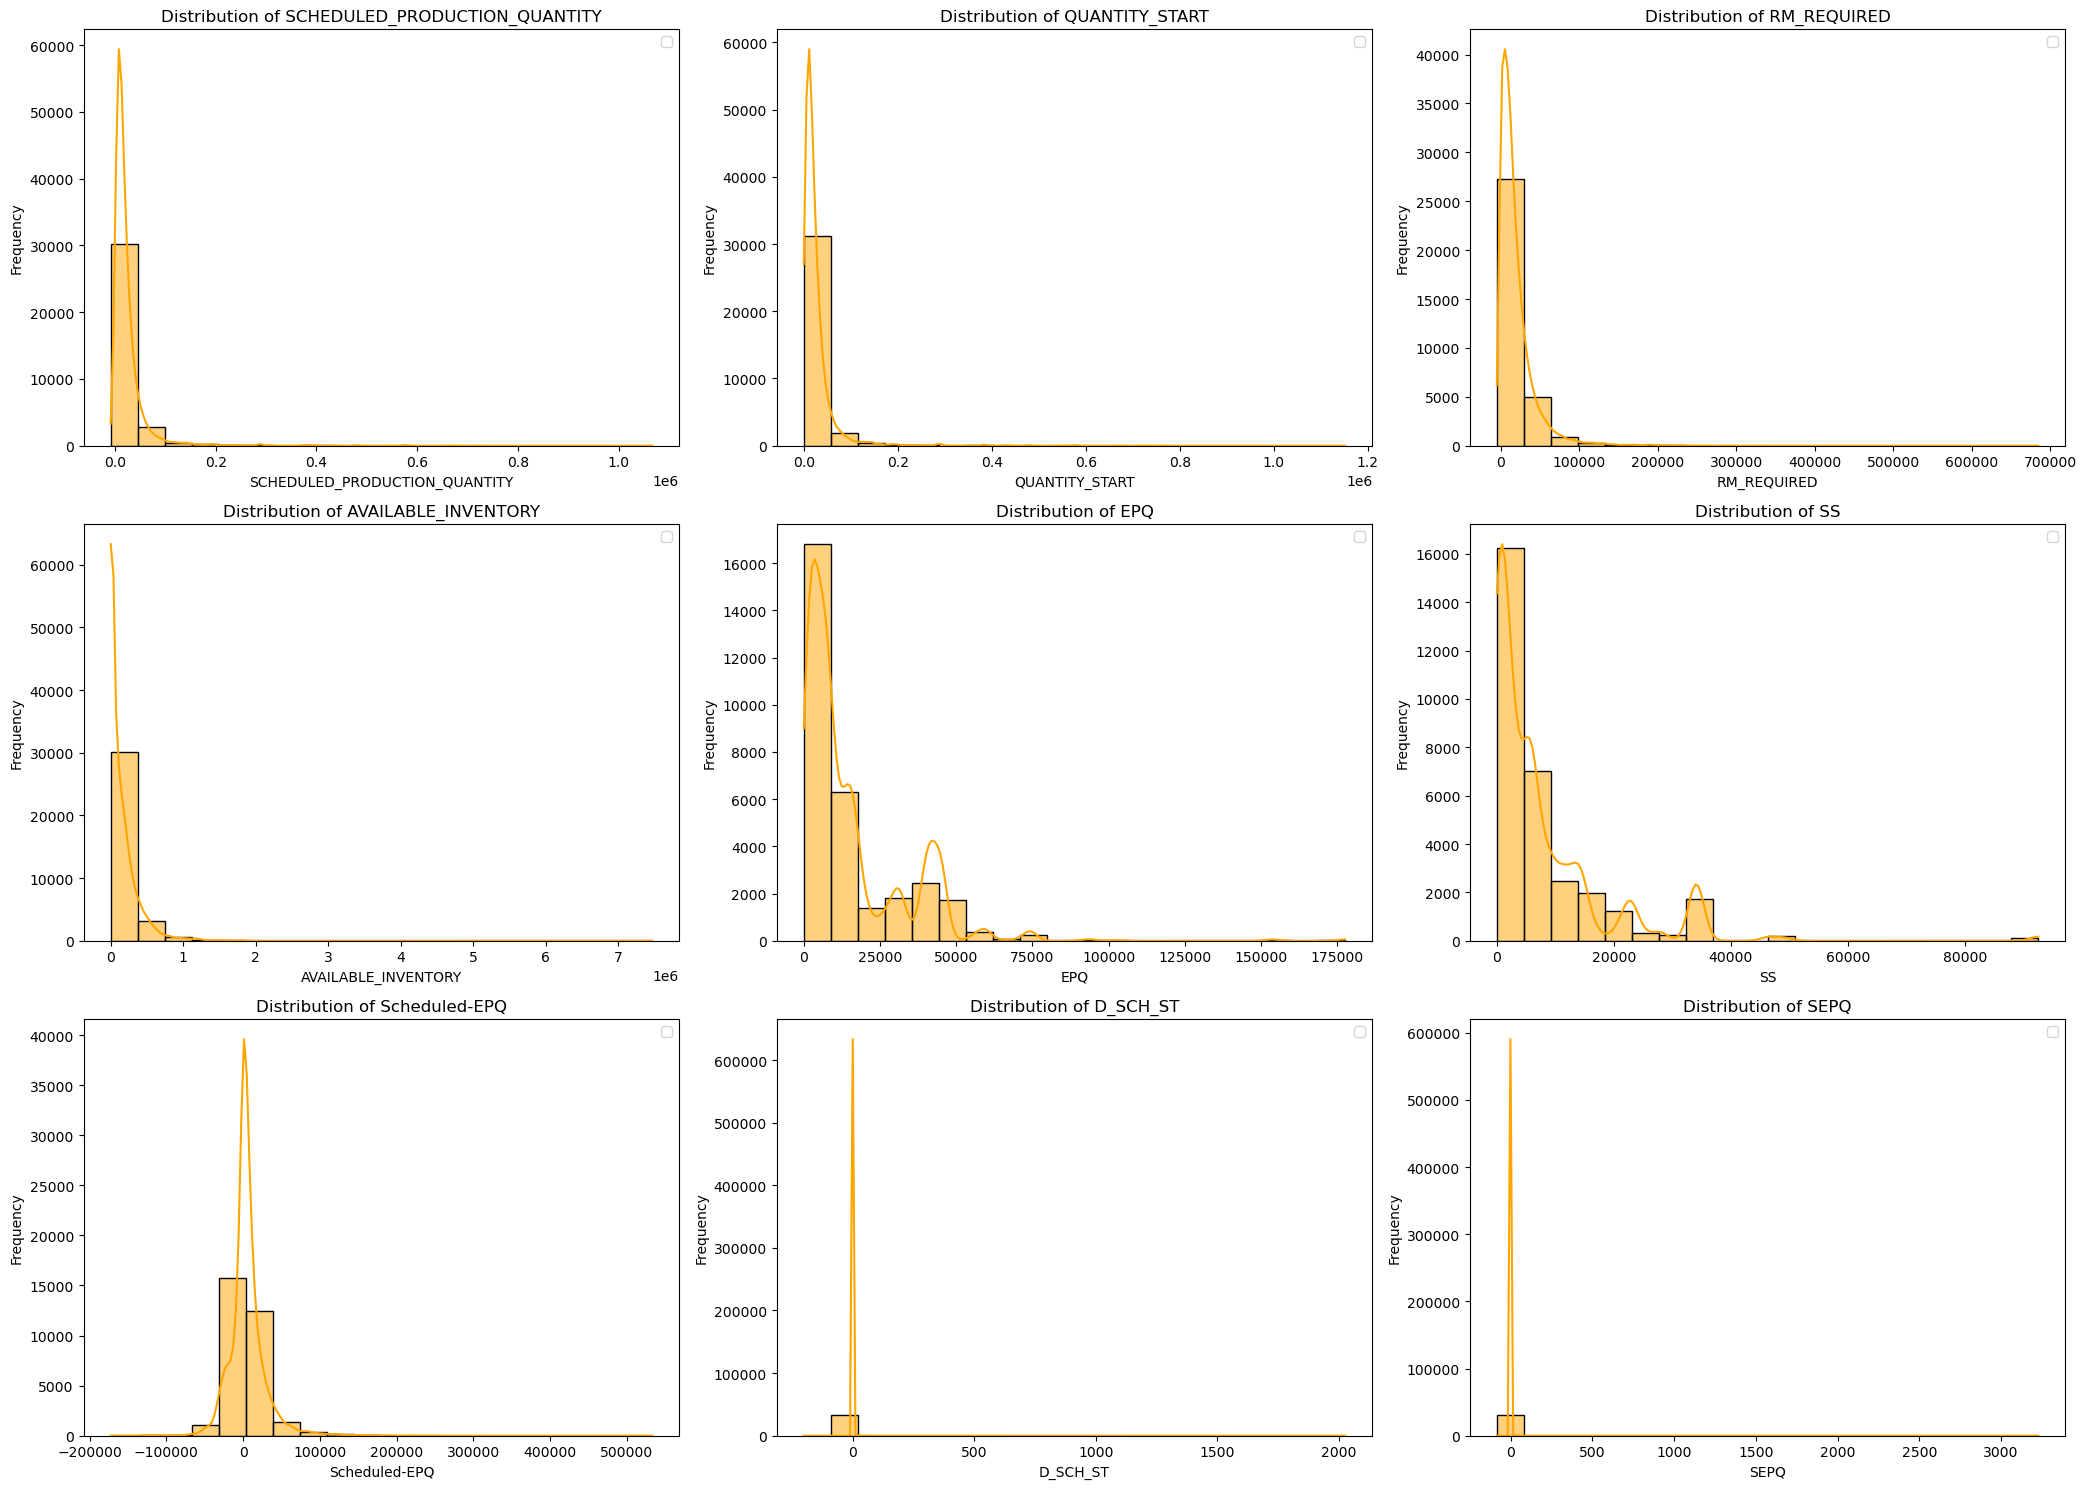

In [38]:
cols = ['SCHEDULED_PRODUCTION_QUANTITY', 'QUANTITY_START', 'RM_REQUIRED', 'AVAILABLE_INVENTORY', 'EPQ', 'SS', 'Scheduled-EPQ',
       'D_SCH_ST', 'SEPQ']
num_plots = len(cols)
num_cols = 3  
num_rows = -(-num_plots // num_cols)  
fig, axes = plt.subplots(num_rows, num_cols, figsize=(21, 5 * num_rows))  # Adjust the figure size as needed

for i, feature in enumerate(cols):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    sns.histplot(data[feature], kde=True, color='orange', alpha=0.5, bins=20, ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.legend()

if num_plots % num_cols != 0:
    for j in range(num_plots % num_cols, num_cols):
        axes[-1, j].axis('off')

plt.tight_layout()
plt.show()

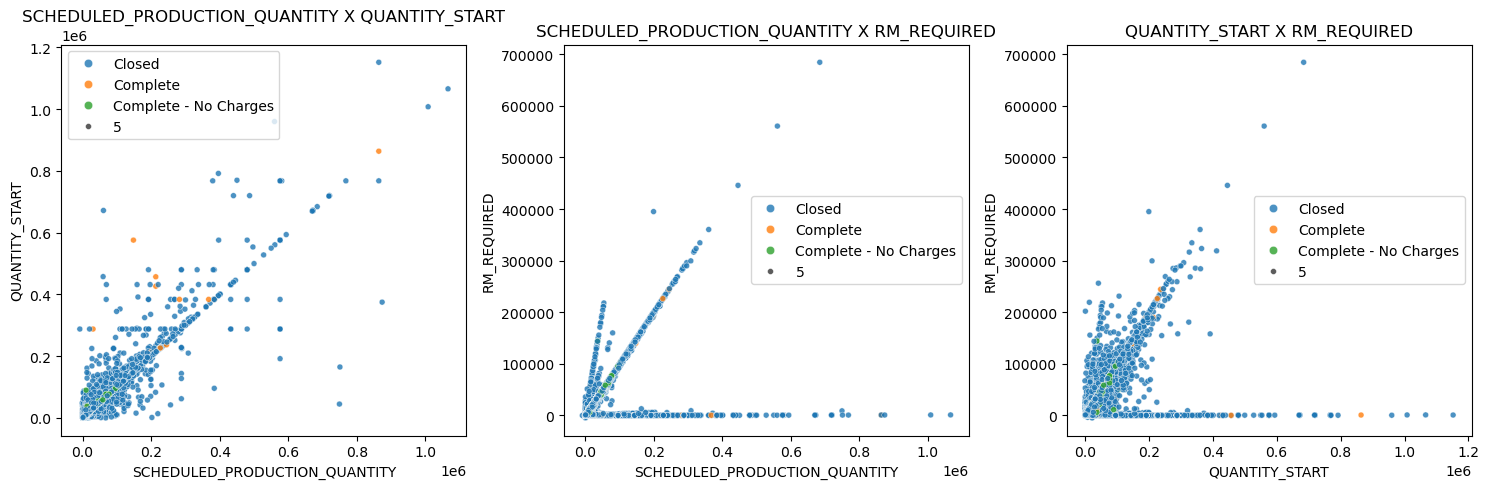

In [57]:
combinations = [['SCHEDULED_PRODUCTION_QUANTITY', 'QUANTITY_START'], ['SCHEDULED_PRODUCTION_QUANTITY','RM_REQUIRED'], ['QUANTITY_START', 'RM_REQUIRED']]
categories = ['JOB_STATUS', 'JOB_CREATION_FLAG', 'RM Item Coverage', 'Job Coverage', 'LMS']
num_plots = len(combinations)
num_cols = 3  
num_rows = -(-num_plots // num_cols)  
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  # Adjust the figure size as needed

for i, combination in enumerate(combinations): 
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    sns.scatterplot(data[combination], x=combination[0], y=combination[1], hue=data['JOB_STATUS'], alpha=0.8, size=5, ax=ax)
    ax.set_title(f'{combination[0]} X {combination[1]}')
    ax.set_xlabel(combination[0])
    ax.set_ylabel(combination[1])
    ax.legend()

if num_plots % num_cols != 0:
    for j in range(num_plots % num_cols, num_cols):
        axes[-1, j].axis('off')

plt.tight_layout()
plt.show()

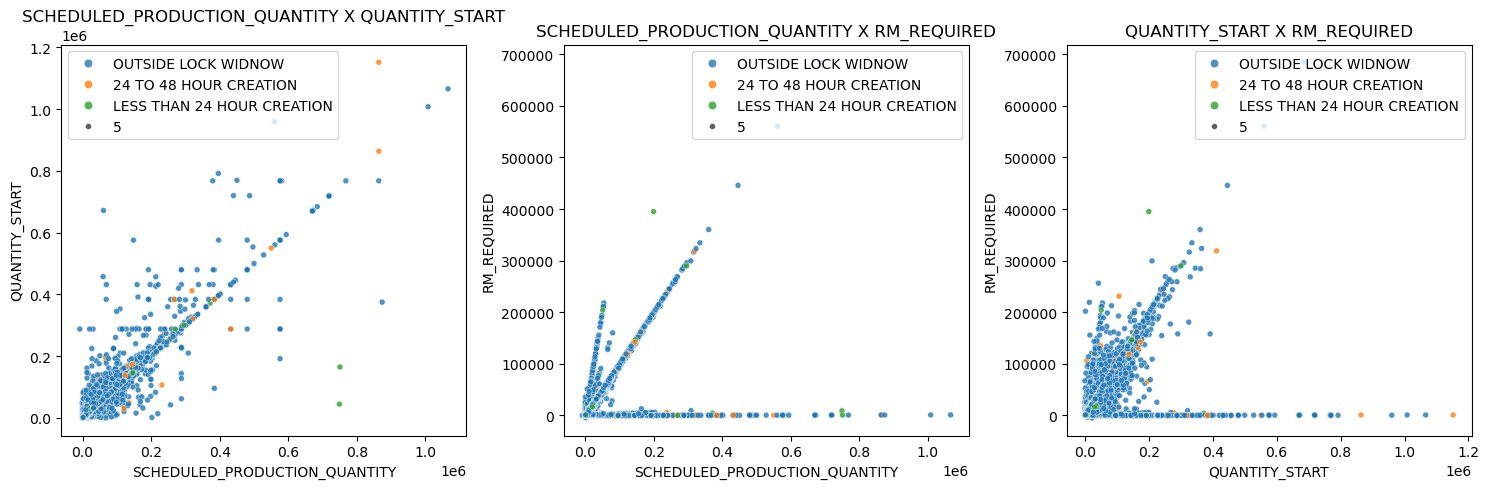

In [ ]:
num_plots = len(combinations)
num_cols = 3  
num_rows = -(-num_plots // num_cols)  
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  # Adjust the figure size as needed

for i, combination in enumerate(combinations): 
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    sns.scatterplot(data[combination], x=combination[0], y=combination[1], hue=data['JOB_CREATION_FLAG'], alpha=0.8, size=5, ax=ax)
    ax.set_title(f'{combination[0]} X {combination[1]}')
    ax.set_xlabel(combination[0])
    ax.set_ylabel(combination[1])
    ax.legend()

if num_plots % num_cols != 0:
    for j in range(num_plots % num_cols, num_cols):
        axes[-1, j].axis('off')

plt.tight_layout()
plt.show()

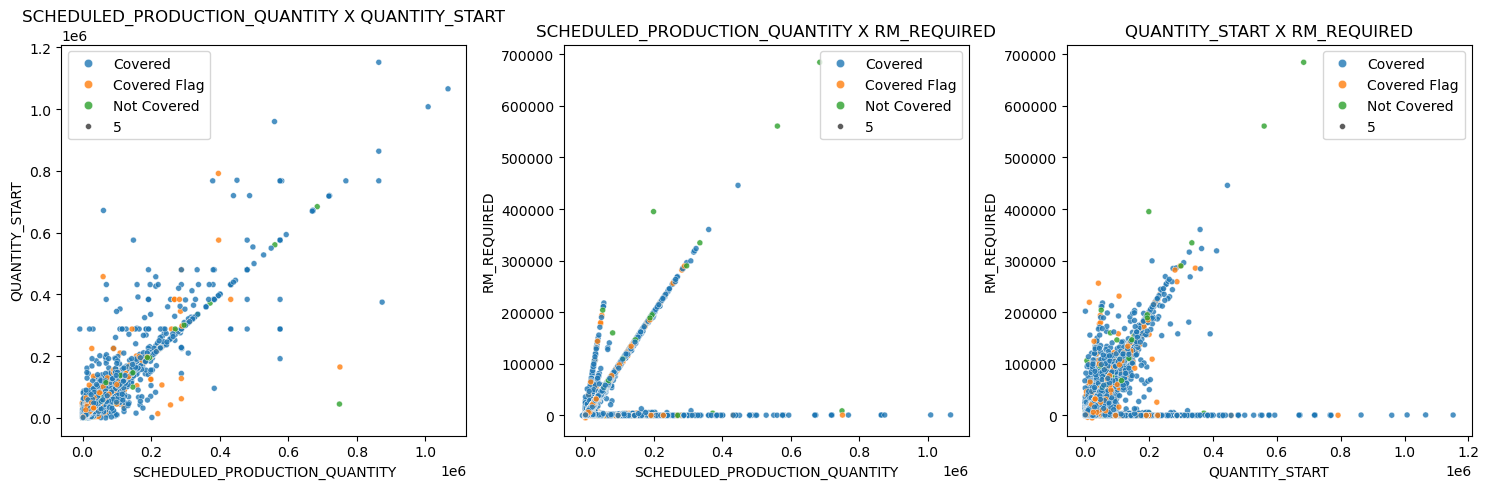

In [ ]:
num_plots = len(combinations)
num_cols = 3  
num_rows = -(-num_plots // num_cols)  
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  # Adjust the figure size as needed

for i, combination in enumerate(combinations): 
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    sns.scatterplot(data[combination], x=combination[0], y=combination[1], hue=data['RM Item Coverage'], alpha=0.8, size=5, ax=ax)
    ax.set_title(f'{combination[0]} X {combination[1]}')
    ax.set_xlabel(combination[0])
    ax.set_ylabel(combination[1])
    ax.legend()

if num_plots % num_cols != 0:
    for j in range(num_plots % num_cols, num_cols):
        axes[-1, j].axis('off')

plt.tight_layout()
plt.show()

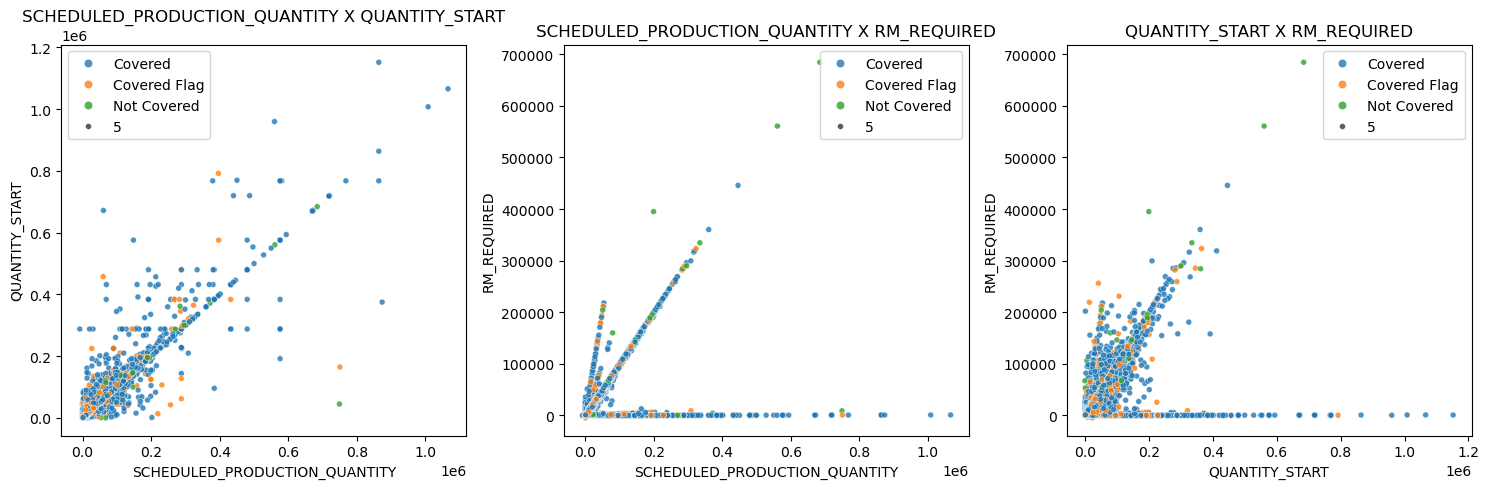

In [ ]:
num_plots = len(combinations)
num_cols = 3  
num_rows = -(-num_plots // num_cols)  
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  # Adjust the figure size as needed

for i, combination in enumerate(combinations): 
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    sns.scatterplot(data[combination], x=combination[0], y=combination[1], hue=data['Job Coverage'], alpha=0.8, size=5, ax=ax)
    ax.set_title(f'{combination[0]} X {combination[1]}')
    ax.set_xlabel(combination[0])
    ax.set_ylabel(combination[1])
    ax.legend()

if num_plots % num_cols != 0:
    for j in range(num_plots % num_cols, num_cols):
        axes[-1, j].axis('off')

plt.tight_layout()
plt.show()

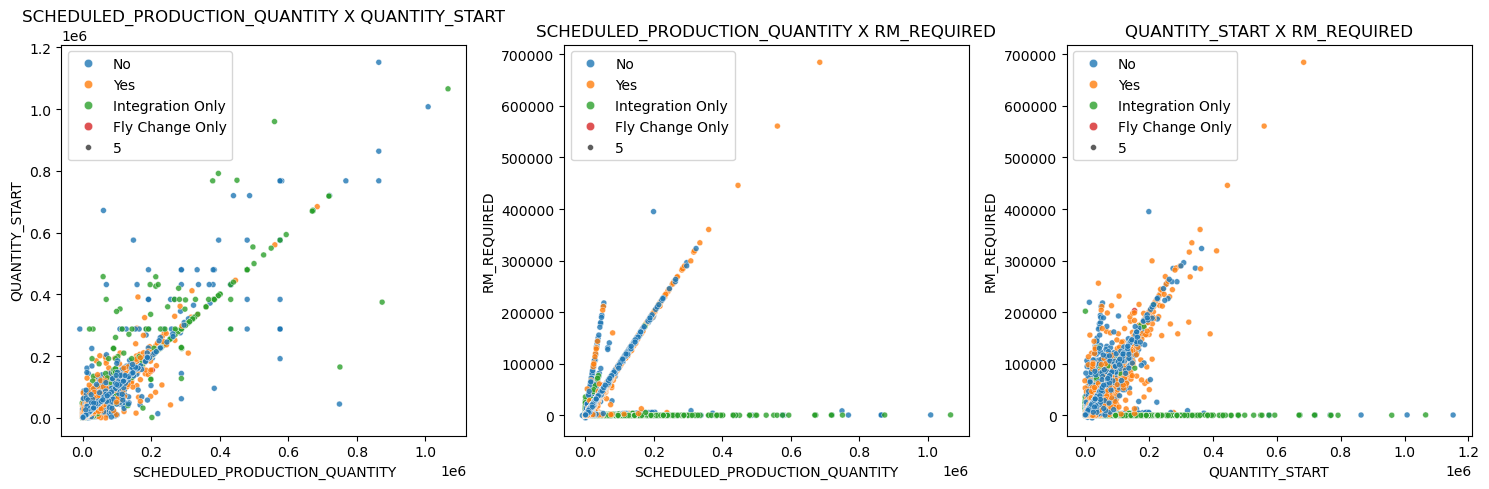

In [ ]:
num_plots = len(combinations)
num_cols = 3  
num_rows = -(-num_plots // num_cols)  
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  # Adjust the figure size as needed

for i, combination in enumerate(combinations): 
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    sns.scatterplot(data[combination], x=combination[0], y=combination[1], hue=data['LMS'], alpha=0.8, size=5, ax=ax)
    ax.set_title(f'{combination[0]} X {combination[1]}')
    ax.set_xlabel(combination[0])
    ax.set_ylabel(combination[1])
    ax.legend()

if num_plots % num_cols != 0:
    for j in range(num_plots % num_cols, num_cols):
        axes[-1, j].axis('off')

plt.tight_layout()
plt.show()

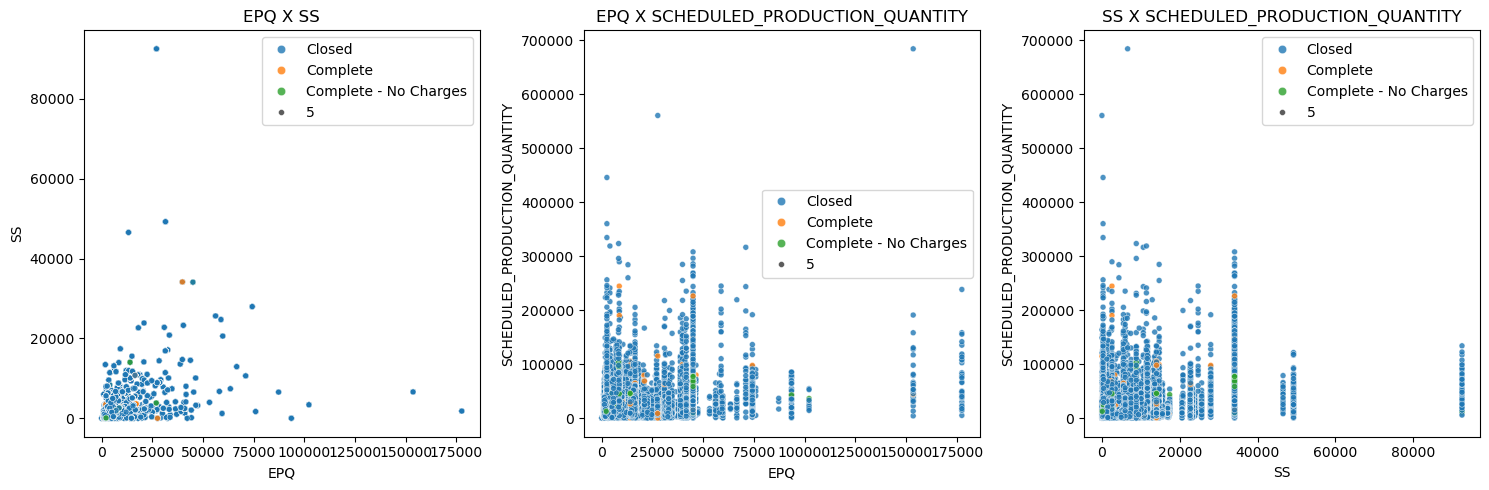

In [59]:
combinations = [['EPQ', 'SS'], ['EPQ','SCHEDULED_PRODUCTION_QUANTITY'], ['SS', 'SCHEDULED_PRODUCTION_QUANTITY']]
categories = ['JOB_STATUS', 'JOB_CREATION_FLAG', 'RM Item Coverage', 'Job Coverage', 'LMS']
num_plots = len(combinations)
num_cols = 3  
num_rows = -(-num_plots // num_cols)  
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  # Adjust the figure size as needed

for i, combination in enumerate(combinations): 
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    sns.scatterplot(data[combination], x=combination[0], y=combination[1], hue=data['JOB_STATUS'], alpha=0.8, size=5, ax=ax)
    ax.set_title(f'{combination[0]} X {combination[1]}')
    ax.set_xlabel(combination[0])
    ax.set_ylabel(combination[1])
    ax.legend()

if num_plots % num_cols != 0:
    for j in range(num_plots % num_cols, num_cols):
        axes[-1, j].axis('off')

plt.tight_layout()
plt.show()

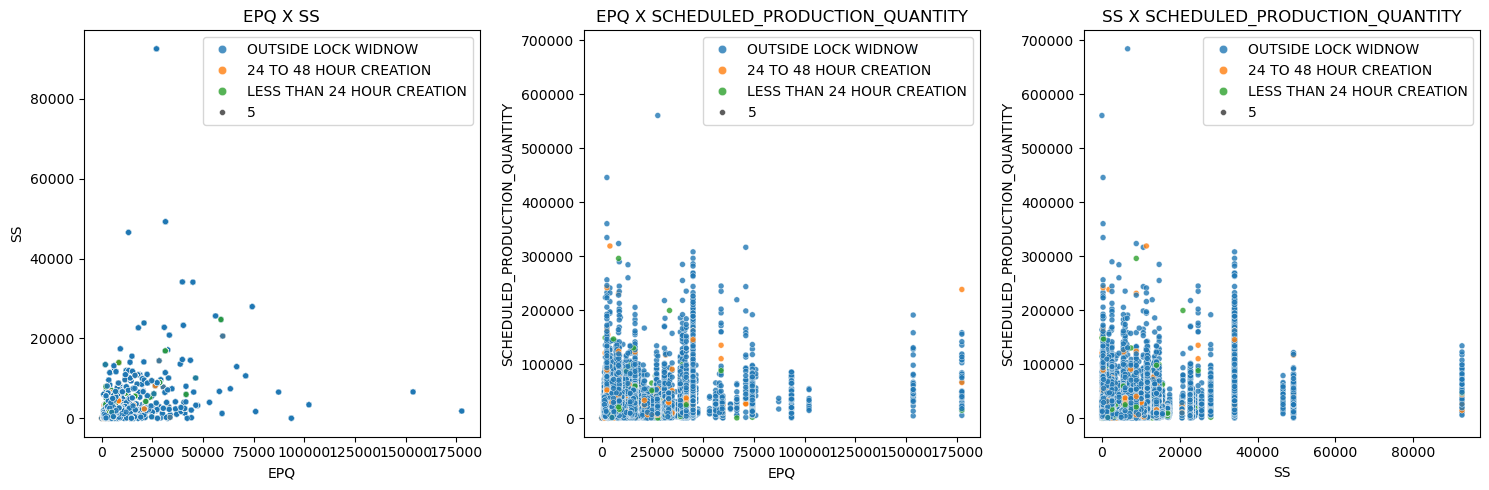

In [ ]:
num_plots = len(combinations)
num_cols = 3  
num_rows = -(-num_plots // num_cols)  
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  # Adjust the figure size as needed

for i, combination in enumerate(combinations): 
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    sns.scatterplot(data[combination], x=combination[0], y=combination[1], hue=data['JOB_CREATION_FLAG'], alpha=0.8, size=5, ax=ax)
    ax.set_title(f'{combination[0]} X {combination[1]}')
    ax.set_xlabel(combination[0])
    ax.set_ylabel(combination[1])
    ax.legend()

if num_plots % num_cols != 0:
    for j in range(num_plots % num_cols, num_cols):
        axes[-1, j].axis('off')

plt.tight_layout()
plt.show()

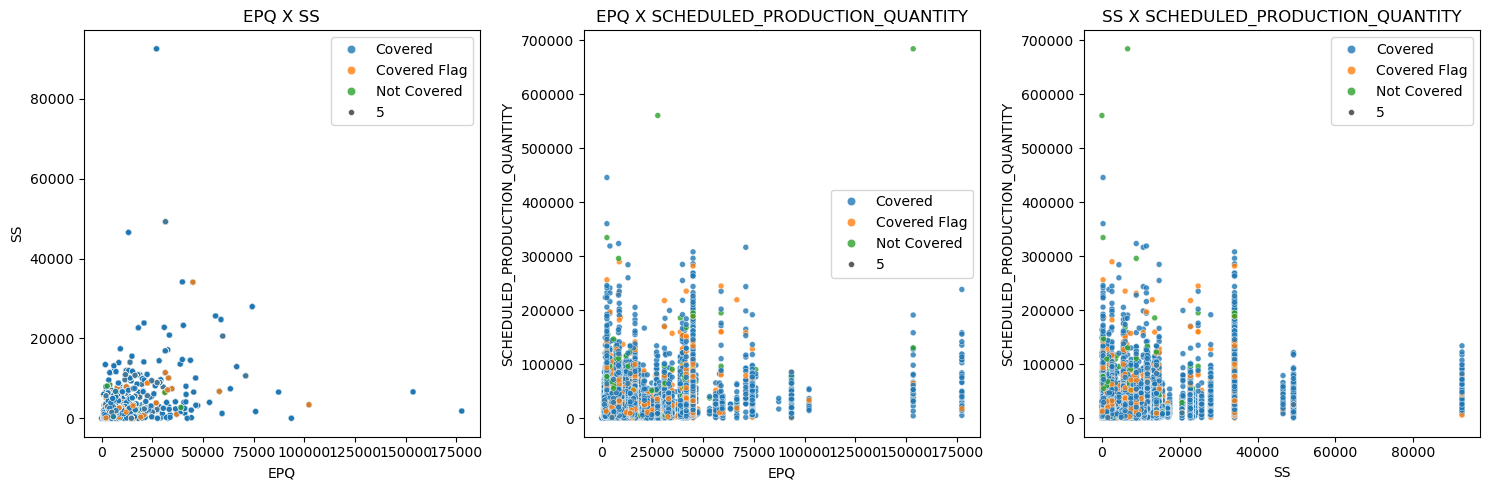

In [ ]:
num_plots = len(combinations)
num_cols = 3  
num_rows = -(-num_plots // num_cols)  
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  # Adjust the figure size as needed

for i, combination in enumerate(combinations): 
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    sns.scatterplot(data[combination], x=combination[0], y=combination[1], hue=data['RM Item Coverage'], alpha=0.8, size=5, ax=ax)
    ax.set_title(f'{combination[0]} X {combination[1]}')
    ax.set_xlabel(combination[0])
    ax.set_ylabel(combination[1])
    ax.legend()

if num_plots % num_cols != 0:
    for j in range(num_plots % num_cols, num_cols):
        axes[-1, j].axis('off')

plt.tight_layout()
plt.show()

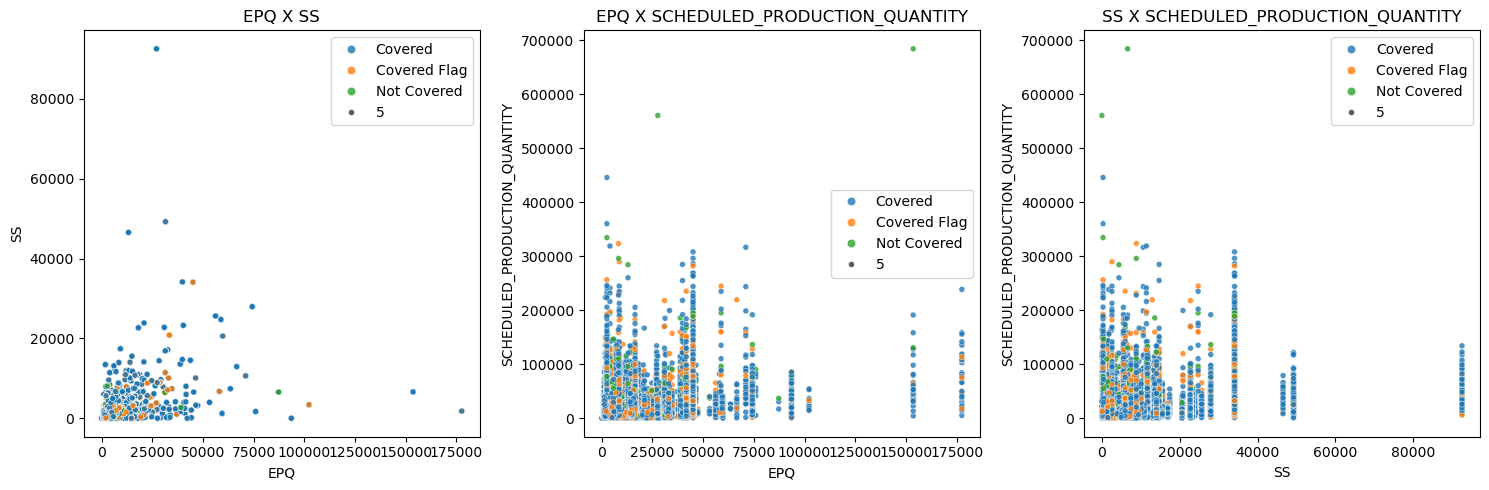

In [ ]:
num_plots = len(combinations)
num_cols = 3  
num_rows = -(-num_plots // num_cols)  
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  # Adjust the figure size as needed

for i, combination in enumerate(combinations): 
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    sns.scatterplot(data[combination], x=combination[0], y=combination[1], hue=data['Job Coverage'], alpha=0.8, size=5, ax=ax)
    ax.set_title(f'{combination[0]} X {combination[1]}')
    ax.set_xlabel(combination[0])
    ax.set_ylabel(combination[1])
    ax.legend()

if num_plots % num_cols != 0:
    for j in range(num_plots % num_cols, num_cols):
        axes[-1, j].axis('off')

plt.tight_layout()
plt.show()

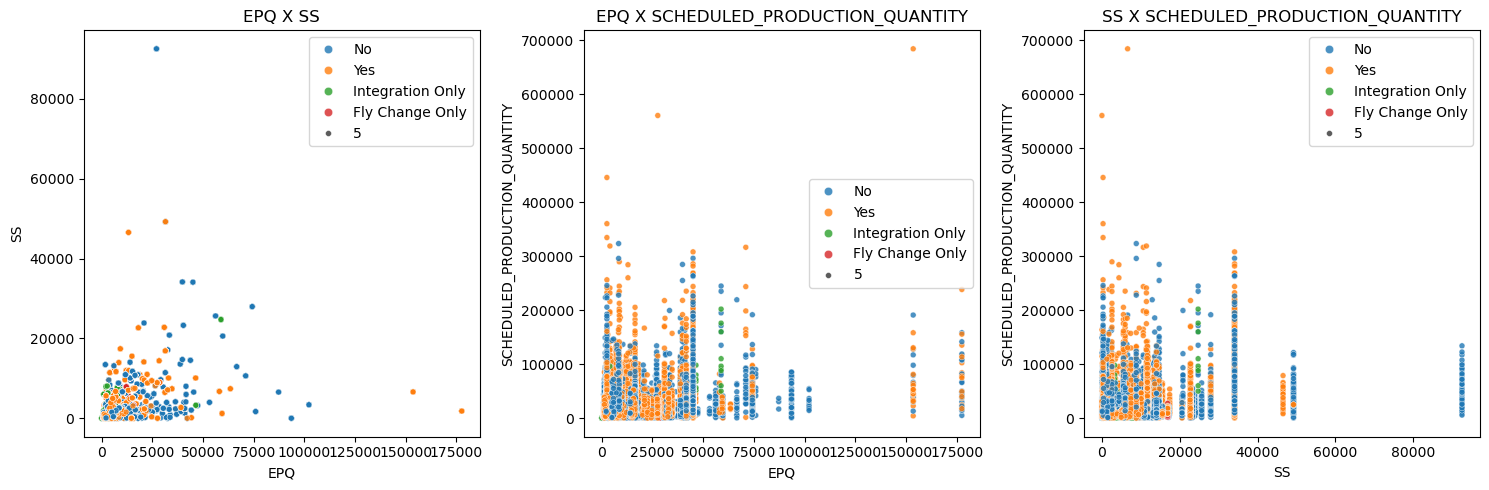

In [60]:
num_plots = len(combinations)
num_cols = 3  
num_rows = -(-num_plots // num_cols)  
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  # Adjust the figure size as needed

for i, combination in enumerate(combinations): 
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    sns.scatterplot(data[combination], x=combination[0], y=combination[1], hue=data['LMS'], alpha=0.8, size=5, ax=ax)
    ax.set_title(f'{combination[0]} X {combination[1]}')
    ax.set_xlabel(combination[0])
    ax.set_ylabel(combination[1])
    ax.legend()

if num_plots % num_cols != 0:
    for j in range(num_plots % num_cols, num_cols):
        axes[-1, j].axis('off')

plt.tight_layout()
plt.show()